In [46]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import MDAnalysis as mda
import MDAnalysis.analysis.rdf as rdf

In [47]:
# Load the energy file
energy_water = np.loadtxt('../Runs/Water/water_aimd_1ps_every0.5fs-1.ener')
energy_proton = np.loadtxt('../Runs/Proton/proton_aimd_1ps_every0.5fs-1.ener')

In [48]:
energy_water

array([[ 0.00000000e+00,  0.00000000e+00,  2.73612846e-01, ...,
        -1.10262945e+03, -1.10235584e+03,  0.00000000e+00],
       [ 1.00000000e+00,  5.00000000e-01,  2.79633819e-01, ...,
        -1.10263473e+03, -1.10235603e+03,  4.47144374e+01],
       [ 2.00000000e+00,  1.00000000e+00,  2.78176228e-01, ...,
        -1.10264369e+03, -1.10235629e+03,  7.23098708e+00],
       ...,
       [ 4.24000000e+02,  2.12000000e+02,  2.40273933e-01, ...,
        -1.10263738e+03, -1.10235586e+03,  8.49062229e+00],
       [ 4.25000000e+02,  2.12500000e+02,  2.43892608e-01, ...,
        -1.10263836e+03, -1.10235595e+03,  8.26430358e+00],
       [ 4.26000000e+02,  2.13000000e+02,  2.55249111e-01, ...,
        -1.10263892e+03, -1.10235602e+03,  8.42560365e+00]])

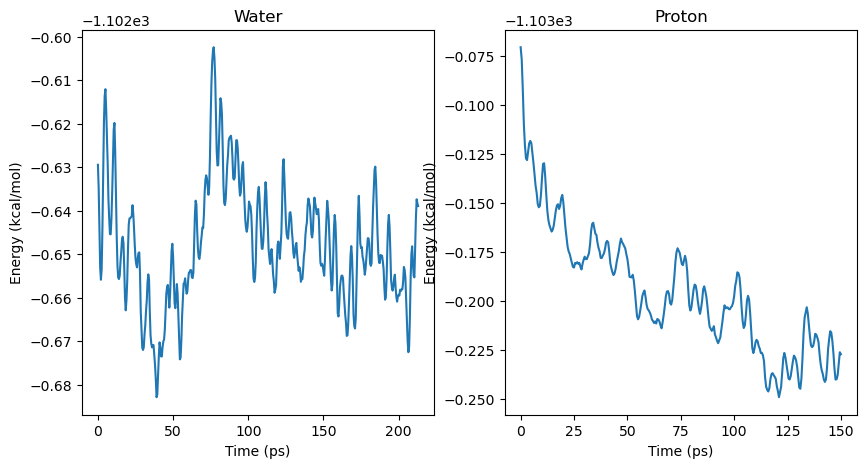

In [49]:
#plot energy vs time of water and proton as subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(energy_water[:,1], energy_water[:,4])
ax1.set_xlabel('Time (ps)')
ax1.set_ylabel('Energy (kcal/mol)')
ax1.set_title('Water')
ax2.plot(energy_proton[:,1], energy_proton[:,4])
ax2.set_xlabel('Time (ps)')
ax2.set_ylabel('Energy (kcal/mol)')
ax2.set_title('Proton')
plt.show()


In [50]:
#use mdanaylsis to calculate g(r) of water and proton
u_water = mda.Universe('../Runs/Water/water.pdb', '../Runs/Water/water_aimd_1ps_every0.5fs-pos-1.xyz')
u_proton = mda.Universe('../Runs/Proton/proton.pdb', '../Runs/Proton/proton_aimd_1ps_every0.5fs-pos-1.xyz')

#set box dimensions
dim = (12.42, 12.42, 12.42, 90, 90, 90)
u_water.dimensions = dim
u_proton.dimensions = dim

#calculate g(r) of water and proton
g_water = rdf.InterRDF(u_water.atoms, u_water.atoms, nbins=100, range=(0.0, 10.0))
g_proton = rdf.InterRDF(u_proton.atoms, u_proton.atoms, nbins=100, range=(0.0, 10.0))

g_water.run()
g_proton.run()


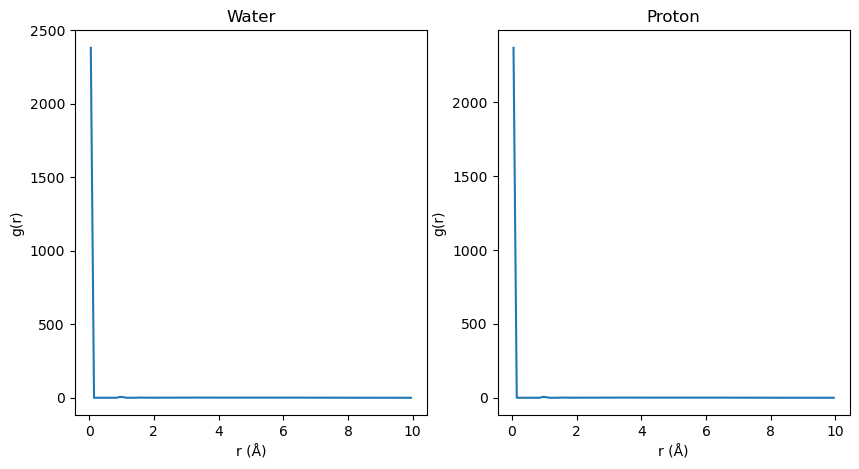

In [51]:
#plot g(r) of water and proton as subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(g_water.bins, g_water.rdf)
ax1.set_xlabel('r (Å)')
ax1.set_ylabel('g(r)')
ax1.set_title('Water')
ax2.plot(g_proton.bins, g_proton.rdf)
ax2.set_xlabel('r (Å)')
ax2.set_ylabel('g(r)')
ax2.set_title('Proton')
plt.show()


